In [3]:
#Remove warnings
import warnings 
warnings.filterwarnings(action="ignore")

In [4]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
# Load the data 
df = pd.read_csv("./delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
# get general informationabs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
# get statistical information 
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
# chack NA values 
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
# 
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot: >

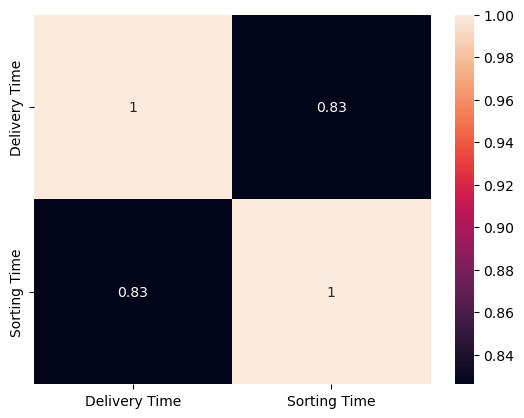

In [10]:
sns.heatmap(df.corr(), annot=True)

### No need to clean data

### split data in x and y

In [11]:
# x 
x = df.drop(['Sorting Time'], axis=1)

#y
y = df['Sorting Time']

In [12]:
# split data in x train and x test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=12345
)

## Model building

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
y_pred

array([3.84564601, 6.4156022 , 6.49992889, 8.8650917 , 4.74914623])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [18]:
# Print Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 1.26
Mean Squared Error (MSE): 3.08
Root Mean Squared Error (RMSE): 1.75
R-squared (R²): 0.49
